Imagine language as a flowing river of words. Language models try to predict what word comes next, based on the words they've already seen. It's like completing a friend's sentence before they finish it!

### **1.N-Gram**

N-grams are like detectives in the land of language, constantly observing and analyzing word patterns to predict what comes next. They break down text into sequences of n words, studying how these sequences follow each other to make educated guesses about future words. Understanding them is crucial for anyone wanting to delve into language modeling, so let's dive deeper!

The Basics:

- **N**: This stands for the number of words in the sequence. So, a bigram (n=2) focuses on pairs of words like "the house," while a trigram (n=3) analyzes sequences like "I love to read."
- **Frequency**: N-gram models count how often these sequences appear in a given text corpus. Imagine them tallying occurrences of word pairs and triplets like a meticulous accountant.
- **Prediction**: Based on these counts, n-grams predict the most likely word to follow a specific sequence. If they see "I love," their prediction might be "pizza" based on previous observations of this trigram appearing frequently.

#### Strengths:

- **Simple and efficient**: N-grams are easy to calculate and require minimal computational resources, making them a good starting point for language modeling.
- **Effective for short-range predictions**: When dealing with smaller chunks of text, like phrases or sentence beginnings, n-grams can be quite accurate in predicting the next word.
- **Useful for tasks like speech recognition and text correction**: Their focus on word patterns helps identify common sequences for specific tasks.

#### Limitations:

- **Ignores long-range dependencies**: N-grams only consider the immediate past, leading to struggles with complex sentences where meaning depends on distant words.
- **Limited context**: They don't capture the broader context of a sentence, leading to potentially nonsensical predictions in certain situations.
- **Data-dependent**: Their accuracy heavily relies on the quality and size of the text corpus they were trained on.

#### Examples:

- **Bigram**: Let's analyze the sentence "The quick brown fox jumps over the lazy dog." "The quick" is a bigram, and the model, based on its training data, might predict "brown" as the next word.
- **Trigram**: If we consider "jumps over the," a trigram, the model could predict "lazy" as the next word with higher confidence than just based on the "over the" bigram.




In [5]:
from nltk import ngrams
from collections import Counter
import random

# Sample text
text = "Language modeling with N-grams is a simple yet effective approach."

# Step 1: Tokenize the text into words
words = text.split()

# Step 2: Generate N-grams
n = 2  # Choose the size of N-grams
ngrams_list = list(ngrams(words, n))

# Step 3: Count the occurrences of N-grams
ngrams_counts = Counter(ngrams_list)

# Step 4: Predict the next word based on the last N-1 words
input_ngram = random.choice(ngrams_list)
predicted_next_word = max(ngrams_counts, key=lambda x: (x[:-1] == input_ngram[-(n-1):], ngrams_counts[x]))

# Display the results
print("N-grams:", ngrams_list)
print("Predicted Next Word:", predicted_next_word[-1])

N-grams: [('Language', 'modeling'), ('modeling', 'with'), ('with', 'N-grams'), ('N-grams', 'is'), ('is', 'a'), ('a', 'simple'), ('simple', 'yet'), ('yet', 'effective'), ('effective', 'approach.')]
Predicted Next Word: a


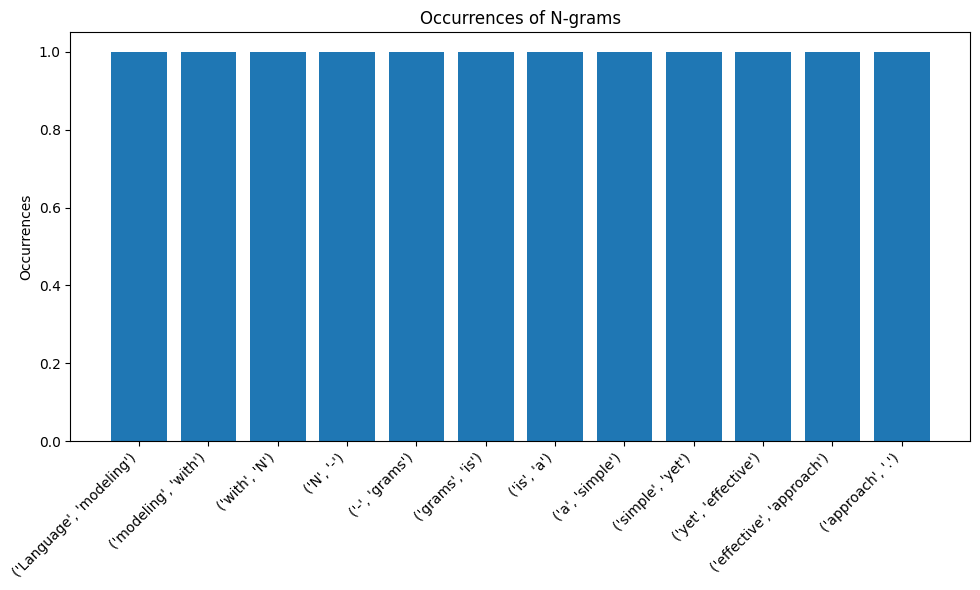

In [6]:
import spacy
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Sample text
text = "Language modeling with N-grams is a simple yet effective approach."

# Step 1: Tokenize the text into words using spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
words = [token.text for token in doc]

# Step 2: Generate N-grams
n = 2  # Choose the size of N-grams
ngrams_list = list(ngrams(words, n))

# Step 3: Count the occurrences of N-grams
ngrams_counts = Counter(ngrams_list)

# Separate the data for plotting
labels, counts = zip(*ngrams_counts.items())

# Convert labels and counts to lists
labels = list(map(str, labels))

# Visualize the N-gram occurrences with a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, counts)

ax.set_ylabel('Occurrences')
ax.set_title('Occurrences of N-grams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()